# 📺 광고 매체에 따른 판매량 예측

### 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [67]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

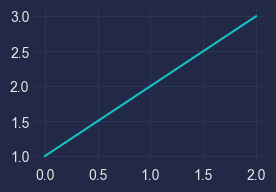

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.Series([1, 2, 3]).plot(figsize=(3, 2))

plt.show()

# .ipynb 커널에서는 plt가 항상 자동으로 표시됩니다. 
# 10번 줄은 수동으로 표시하는 함수라서 .py 파일 내에서는 필요할 수 있지만 여기서는 생략해도 됩니다.
# 10번 줄을 없애면 8번 줄의 반환값이 추가로 표시되기 때문에 못생겨집니다.
# 이걸 없애고 싶다면 plt.show()를 다시 쓰거나, pass로 대체하면 됩니다.
# 또는 8번줄 맨 뒤에 세미콜론을 붙여도 결과가 출력되는 것을 막을 수 있습니다.

### 📚 데이터 불러오기

In [135]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('./data/advertising.csv')
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 🔍 데이터 이해하기

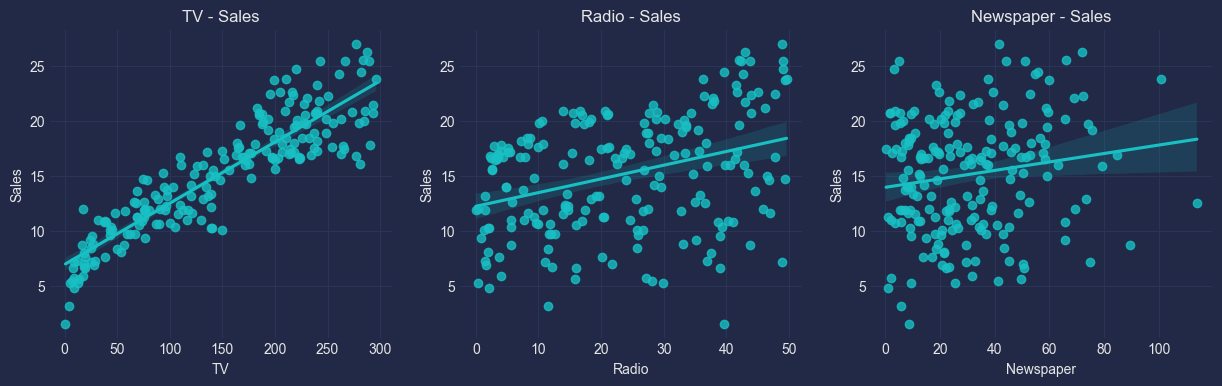

In [136]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title('TV - Sales')
sns.regplot(data=df, x='TV', y='Sales')

plt.subplot(1, 3, 2)
plt.title('Radio - Sales')
sns.regplot(data=df, x='Radio', y='Sales')

plt.subplot(1, 3, 3)
plt.title('Newspaper - Sales')
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.show()


#### 🧲 상관계수

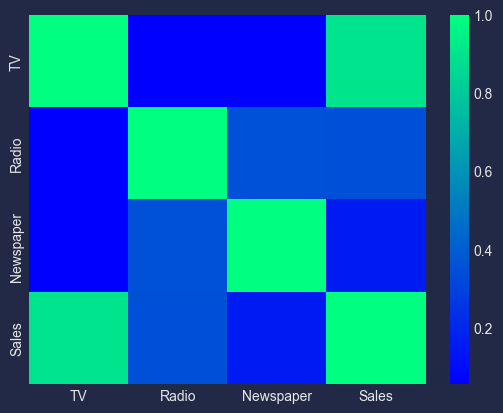

In [137]:
sns.heatmap(df.corr(), cmap='winter')
# 상관계수 행렬을 히트맵으로 표시합니다.
# 밝은 색일수록 더 상관계수가 높습니다.
# 데이터에 열이 많아질 수록, 각 열의 상관계수를 한 눈에 보기 좋겠죠?

plt.show()

### 🔗 선형 회귀; Linear Regression
TV 광고량으로부터 Sales를 예측하는 선형 회귀입니다.

#### 🎚️ 독립 변수와 종속 변수

In [138]:
X = df[['TV']]  
y = df['Sales']

# X: 독립 변수, 입력 변수, Feature(자질). X를 대문자로 쓰는게 관행이라는데, 저는 불호에요.
# y: 종속 변수, 출력 변수

#### ✂️ 데이터셋 분할

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

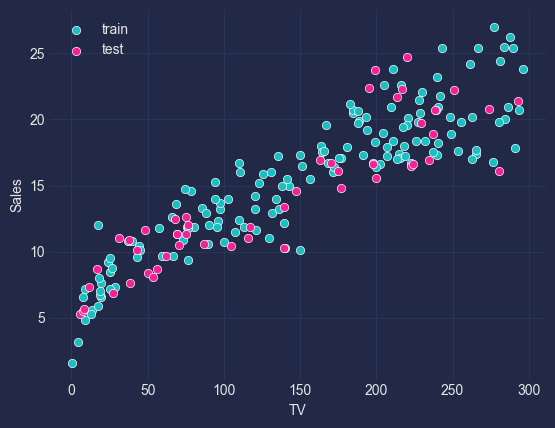

In [142]:
# 선점도 표시
sns.scatterplot(x=X_train['TV'], y=y_train, label='train')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test')
plt.show()

#### 🧠 모델 생성 및 학습

In [143]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### ☑️ 테스트

In [144]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

pred = model.predict(X_test)

# 오차 계산을 위한 라이브러리 함수들
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(
    f'MSE\t: {mse:.2f}\n'
    f'RMSE\t: {rmse:.2f}\n'
    f'MAE\t: {mae:.2f}\n'
    f'R2\t: {r2:.2f}'
)

MSE	: 5.51
RMSE	: 2.35
MAE	: 1.87
R2	: 0.80


In [145]:
df_pred = pd.DataFrame({
    'X_test': X_test['TV'],
    'y_test': y_test,
    'y_pred': pred
})
df_pred['error'] = df_pred['y_test'] - df_pred['y_pred']

df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [146]:
# 오차 계산을 수동으로 하는 방법

mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss / tss)

print(
    f'MSE\t: {mse:.2f}\n'
    f'RMSE\t: {rmse:.2f}\n'
    f'MAE\t: {mae:.2f}\n'
    f'R2\t: {r2:.2f}'
)

MSE	: 5.51
RMSE	: 2.35
MAE	: 1.87
R2	: 0.80


#### 📈 회귀식 분석

In [147]:
print(
    f'회귀계수\t: {model.coef_}\n'
    f'절편\t\t: {model.intercept_}\n'
    f'회귀식\t\t: y = ', end=''
)

for i, coef in enumerate(model.coef_):
    print(f'{coef:.4f} * x_{i} + ', end='')
print(f'{model.intercept_:.4f}')

회귀계수	: [0.05538653]
절편		: 7.098853680118275
회귀식		: y = 0.0554 * x_0 + 7.0989


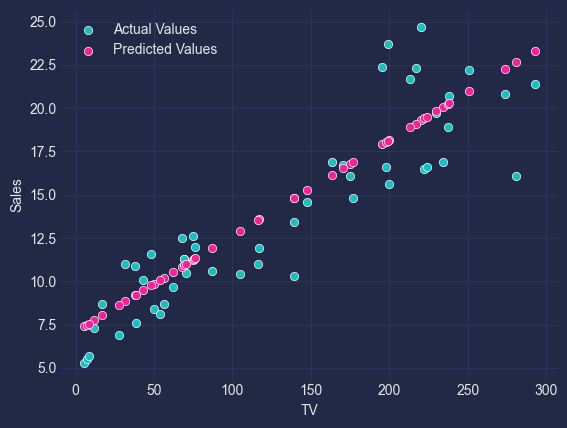

In [148]:
sns.scatterplot(x=X_test['TV'], y=y_test, label='Actual Values')
sns.scatterplot(x=X_test['TV'], y=pred, label='Predicted Values')
plt.show()